<a href="https://www.kaggle.com/code/mostafahabibi1994/stocks-market-analysis-cleaning-noise-nan-vals?scriptVersionId=197028125" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
from datetime import datetime
import warnings
warnings.simplefilter(action ='ignore')

In [2]:
!pip install mplfinance --q

In [3]:
import mplfinance as mpf

In [4]:
#reading the data file
df = pd.read_csv('/kaggle/input/stock-market/Market.csv')
df =  pd.DataFrame(df)

In [5]:
#choosing the NYA index
df = df[df['Index'] == 'NYA']
df

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,12/31/1965,528.690002,528.690002,528.690002,528.690002,528.690002,0.000000e+00
1,NYA,1/3/1966,527.210022,527.210022,527.210022,527.210022,527.210022,0.000000e+00
2,NYA,1/4/1966,527.840027,527.840027,527.840027,527.840027,527.840027,0.000000e+00
3,NYA,1/5/1966,531.119995,531.119995,531.119995,531.119995,531.119995,0.000000e+00
4,NYA,1/6/1966,532.070007,532.070007,532.070007,532.070007,532.070007,0.000000e+00
...,...,...,...,...,...,...,...,...
13943,NYA,5/24/2021,16375.000000,16508.519530,16375.000000,16464.689450,16464.689450,2.947400e+09
13944,NYA,5/25/2021,16464.689450,16525.810550,16375.150390,16390.189450,16390.189450,3.420870e+09
13945,NYA,5/26/2021,16390.189450,16466.339840,16388.320310,16451.960940,16451.960940,3.674490e+09
13946,NYA,5/27/2021,16451.960940,16546.359380,16451.960940,16531.949220,16531.949220,5.201110e+09


In [6]:
#making the date feature into a datatime format
df['Date'] = pd.to_datetime(df.Date)
df

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.000000e+00
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.000000e+00
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.000000e+00
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.000000e+00
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.000000e+00
...,...,...,...,...,...,...,...,...
13943,NYA,2021-05-24,16375.000000,16508.519530,16375.000000,16464.689450,16464.689450,2.947400e+09
13944,NYA,2021-05-25,16464.689450,16525.810550,16375.150390,16390.189450,16390.189450,3.420870e+09
13945,NYA,2021-05-26,16390.189450,16466.339840,16388.320310,16451.960940,16451.960940,3.674490e+09
13946,NYA,2021-05-27,16451.960940,16546.359380,16451.960940,16531.949220,16531.949220,5.201110e+09


In [7]:
#sorting the values of the date feature
df.sort_values(by = 'Date')

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.000000e+00
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.000000e+00
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.000000e+00
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.000000e+00
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.000000e+00
...,...,...,...,...,...,...,...,...
13943,NYA,2021-05-24,16375.000000,16508.519530,16375.000000,16464.689450,16464.689450,2.947400e+09
13944,NYA,2021-05-25,16464.689450,16525.810550,16375.150390,16390.189450,16390.189450,3.420870e+09
13945,NYA,2021-05-26,16390.189450,16466.339840,16388.320310,16451.960940,16451.960940,3.674490e+09
13946,NYA,2021-05-27,16451.960940,16546.359380,16451.960940,16531.949220,16531.949220,5.201110e+09


In [8]:
#seeing if there are any NaN values in the data
df.isna().sum()

Index         0
Date          0
Open          1
High          2
Low           3
Close         4
Adj Close    10
Volume        1
dtype: int64

In [9]:
#getting the exact place of the NaN Values in the data for making better decisions for the fate of NaN values
df.loc[pd.isna(df.values) , :]

,Index,Date,Open,High,Low,Close,Adj Close,Volume
102,NYA,1966-05-26,496.750000,496.750000,NaN,496.750000,496.750000,0.0
104,NYA,1966-05-31,491.679993,491.679993,491.679993,NaN,491.679993,0.0
154,NYA,1966-08-10,476.660004,476.660004,476.660004,476.660004,NaN,0.0
170,NYA,1966-09-01,443.459991,443.459991,443.459991,NaN,443.459991,0.0
190,NYA,1966-09-30,436.700012,NaN,436.700012,436.700012,436.700012,0.0
231,NYA,1966-11-30,460.910004,460.910004,NaN,460.910004,460.910004,0.0
257,NYA,1967-01-09,476.660004,476.660004,476.660004,476.660004,NaN,0.0
282,NYA,1967-02-13,506.899994,506.899994,506.899994,506.899994,NaN,0.0
289,NYA,1967-02-23,NaN,NaN,NaN,NaN,NaN,NaN
289,NYA,1967-02-23,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#droping the 289 index
#because it's completely NaN and there is no ponit filling it
df = df.drop(289)
df = df.reset_index(drop=True)
df

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.000000e+00
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.000000e+00
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.000000e+00
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.000000e+00
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.000000e+00
...,...,...,...,...,...,...,...,...
13942,NYA,2021-05-24,16375.000000,16508.519530,16375.000000,16464.689450,16464.689450,2.947400e+09
13943,NYA,2021-05-25,16464.689450,16525.810550,16375.150390,16390.189450,16390.189450,3.420870e+09
13944,NYA,2021-05-26,16390.189450,16466.339840,16388.320310,16451.960940,16451.960940,3.674490e+09
13945,NYA,2021-05-27,16451.960940,16546.359380,16451.960940,16531.949220,16531.949220,5.201110e+09


In [11]:
#locating the NaN values Again
df.loc[pd.isna(df.values), : ]

,Index,Date,Open,High,Low,Close,Adj Close,Volume
102,NYA,1966-05-26,496.750000,496.750000,NaN,496.750000,496.750000,0.0
104,NYA,1966-05-31,491.679993,491.679993,491.679993,NaN,491.679993,0.0
154,NYA,1966-08-10,476.660004,476.660004,476.660004,476.660004,NaN,0.0
170,NYA,1966-09-01,443.459991,443.459991,443.459991,NaN,443.459991,0.0
190,NYA,1966-09-30,436.700012,NaN,436.700012,436.700012,436.700012,0.0
231,NYA,1966-11-30,460.910004,460.910004,NaN,460.910004,460.910004,0.0
257,NYA,1967-01-09,476.660004,476.660004,476.660004,476.660004,NaN,0.0
282,NYA,1967-02-13,506.899994,506.899994,506.899994,506.899994,NaN,0.0
306,NYA,1967-03-21,521.280029,521.280029,521.280029,521.280029,NaN,0.0
332,NYA,1967-04-27,544.020020,544.020020,544.020020,544.020020,NaN,0.0


In [12]:
#filling the NaN values with 'pad' method
#because in each row that has a NaN value all the other values are repeated and are the same
df = df.fillna(method = 'pad' , axis = 1)

In [13]:
#seeing if there are any NaN values left
df.isna().sum()

Index        0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [14]:
#rounding the numbers and making them int instead of float
df.iloc[:,2:7] = df.iloc[:,2:7] .round(0).astype(int)

In [15]:
df

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528,528,528,528,528,0.0
1,NYA,1966-01-03,527,527,527,527,527,0.0
2,NYA,1966-01-04,527,527,527,527,527,0.0
3,NYA,1966-01-05,531,531,531,531,531,0.0
4,NYA,1966-01-06,532,532,532,532,532,0.0
...,...,...,...,...,...,...,...,...
13942,NYA,2021-05-24,16375,16508,16375,16464,16464,2947400000.0
13943,NYA,2021-05-25,16464,16525,16375,16390,16390,3420870000.0
13944,NYA,2021-05-26,16390,16466,16388,16451,16451,3674490000.0
13945,NYA,2021-05-27,16451,16546,16451,16531,16531,5201110000.0


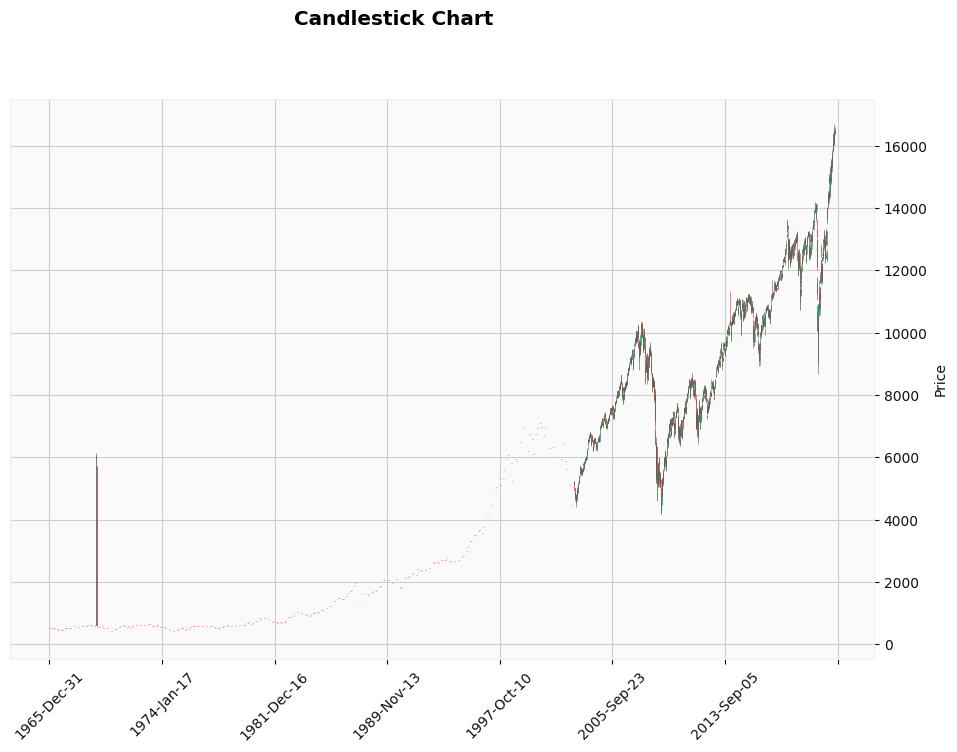

In [16]:
df2 = df.drop(columns= ['Adj Close','Volume','Index'])
df2.index = pd.to_datetime(df2.Date)
mpf.plot(df2, type='candle', title="Candlestick Chart", style = 'yahoo',figsize = (12,8))

In [17]:
#dealing with the noises in  " 'Open' , 'High' , 'Adj Close' "

In [18]:
#locating the noise in 'Open'
df.loc[(df['Date']< '1971-12-31') & (df['Open'] > 5500)]

,Index,Date,Open,High,Low,Close,Adj Close,Volume
851,NYA,1969-06-30,5722,572,572,572,572,0.0


In [19]:
#correcting the noise in 'Open' on 851 index
df.at[851,'Open'] = 572

In [20]:
#locating the noise in 'Adj Close'
df.loc[(df['Date'] < '1971-12-31') & (df['Adj Close'] > 5500)]

,Index,Date,Open,High,Low,Close,Adj Close,Volume
830,NYA,1969-05-29,611,611,611,611,6110,0.0


In [21]:
#correcting the noise in 'Adj Close' on 830 index
df.at[830,'Adj Close'] = 611

In [22]:
#locating the noise in 'High'
df.loc[(df['Date'] < '1971-12-31') & (df['High'] > 5500)]

,Index,Date,Open,High,Low,Close,Adj Close,Volume
828,NYA,1969-05-27,612,6124,612,612,612,0.0
832,NYA,1969-06-03,606,6065,606,606,606,0.0


In [23]:
#correcting the noises in 'High' on 828 and 832 indexes
df.at[828,'High'] = 612
df.at[832,'High'] = 606

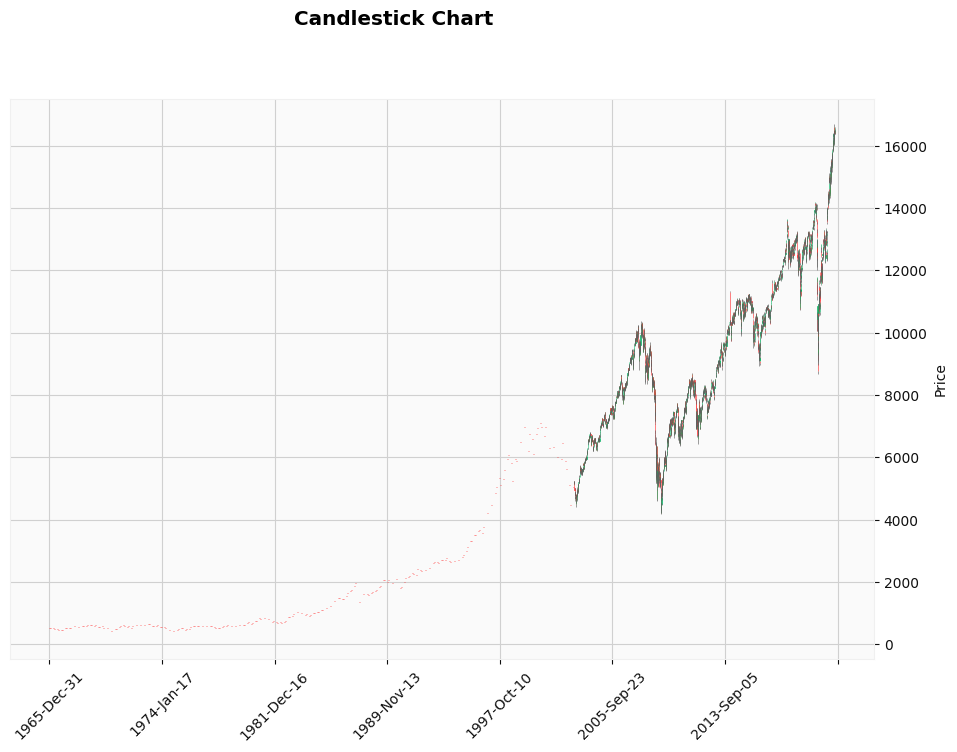

In [24]:
df2 = df.drop(columns= ['Adj Close','Volume','Index'])
df2.index = pd.to_datetime(df2.Date)
mpf.plot(df2, type='candle', title="Candlestick Chart", style = 'yahoo',figsize = (12,8))